In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')



In [157]:
df=pd.read_csv('mushroom_csv')
df.head(10)


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,...,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,s,m,e


In [10]:
df.shape

(8124, 23)

In [5]:
df.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises%3F                  object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
class                       object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [13]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [15]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [34]:
df.isnull()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

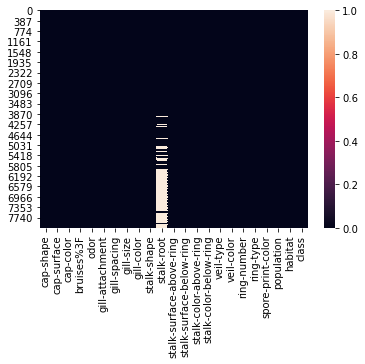

In [37]:
sns.heatmap(df.isnull())

In [38]:
df.drop(columns='stalk-root',inplace=True)

In [39]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


# datavisualization

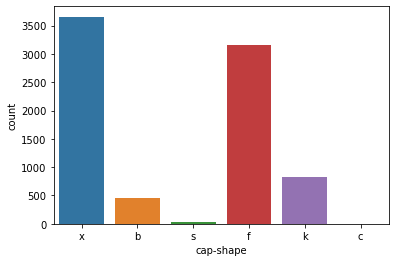

In [23]:
sns.countplot(df['cap-shape'])

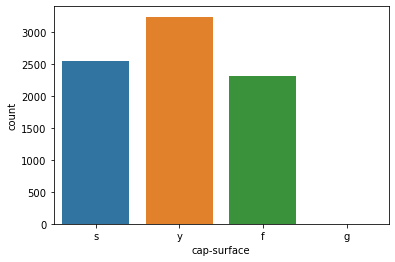

In [24]:
sns.countplot(df['cap-surface'])

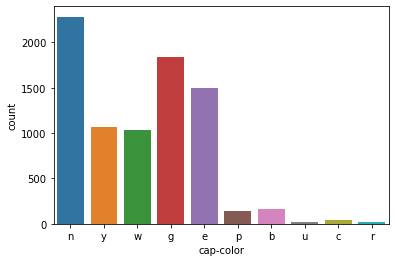

In [25]:
sns.countplot(df['cap-color'])

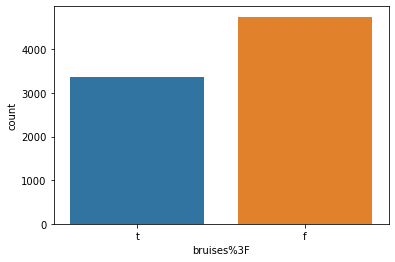

In [26]:
sns.countplot(df['bruises%3F'])

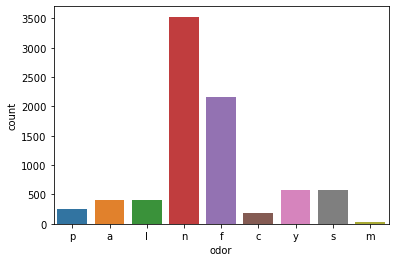

In [27]:
sns.countplot(df['odor'])

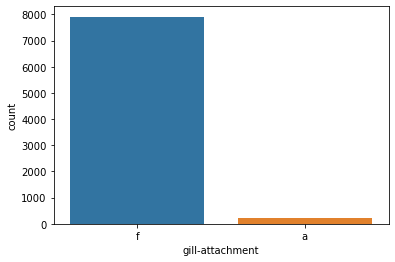

In [40]:
sns.countplot(df['gill-attachment'])

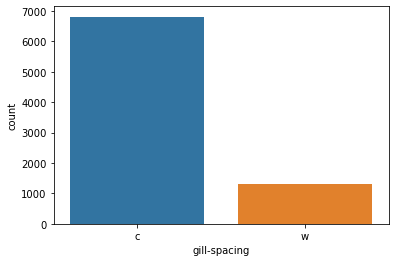

In [41]:
sns.countplot(df['gill-spacing'])

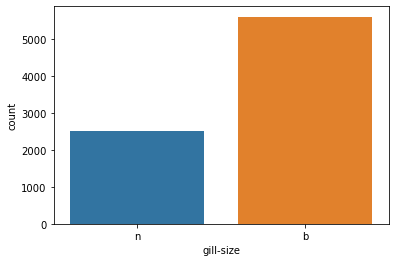

In [42]:
sns.countplot(df['gill-size'])

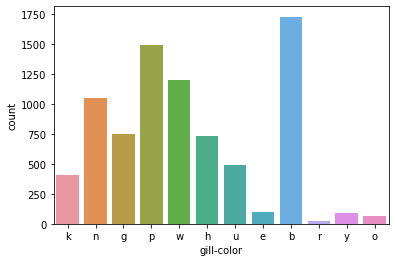

In [43]:
sns.countplot(df['gill-color'])

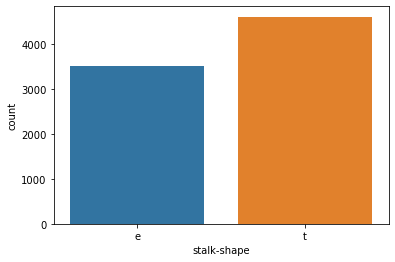

In [44]:
sns.countplot(df['stalk-shape'])

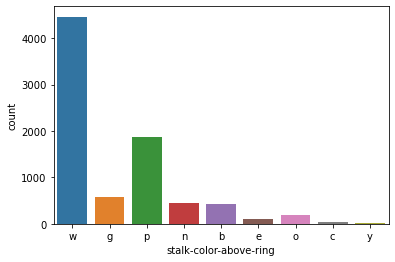

In [45]:
sns.countplot(df['stalk-color-above-ring'])

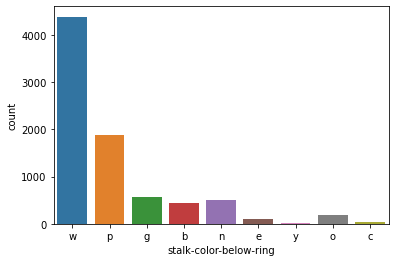

In [46]:
sns.countplot(df['stalk-color-below-ring'])

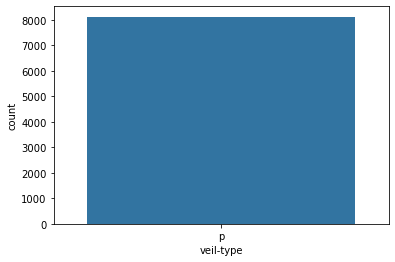

In [47]:
sns.countplot(df['veil-type'])

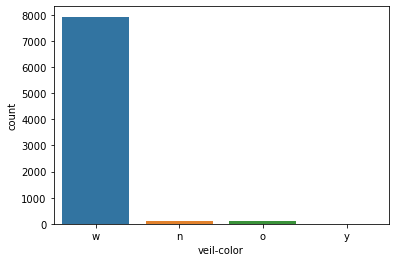

In [48]:
sns.countplot(df['veil-color'])

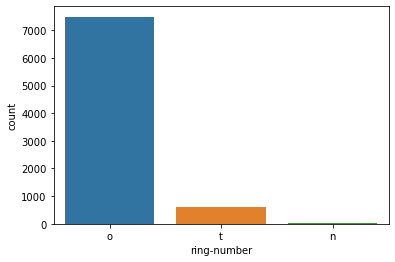

In [49]:
sns.countplot(df['ring-number'])

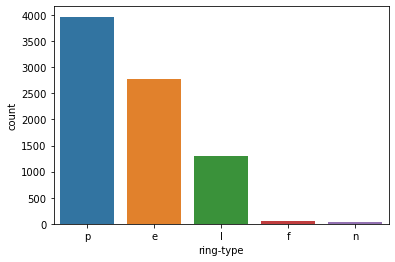

In [50]:
sns.countplot(df['ring-type'])

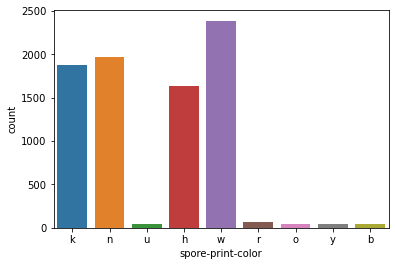

In [51]:
sns.countplot(df['spore-print-color'])


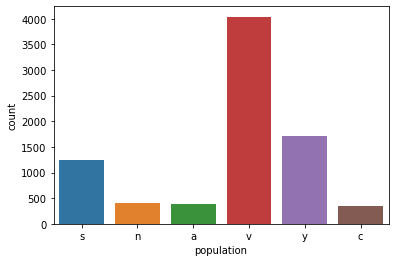

In [52]:
sns.countplot(df['population'])


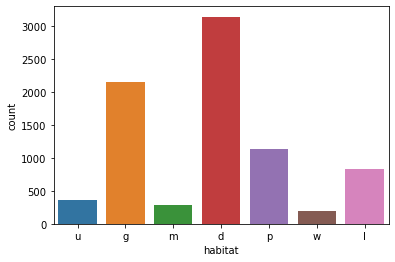

In [53]:
sns.countplot(df['habitat'])


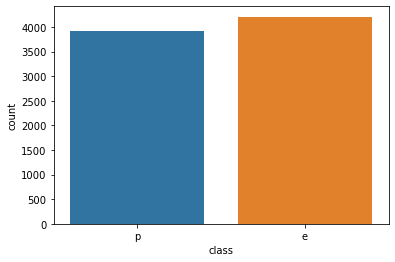

In [54]:
sns.countplot(df['class'])


# encoding the values

In [17]:
df.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises%3F                  object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
class                       object
dtype: object

In [115]:
mappings = list()

encoder = LabelEncoder()
for column in range(len(df.columns)):
    df[df.columns[column]]=encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [116]:
mappings

[{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
 {0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11},
 {0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6},
 {0: 0, 1: 1}]

# checking for outliers

In [117]:
import matplotlib.pyplot as plt

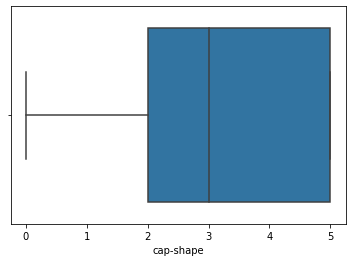

In [118]:
sns.boxplot(df['cap-shape'])

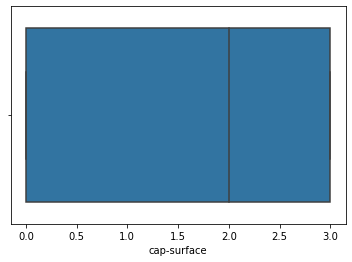

In [119]:
sns.boxplot(df['cap-surface'])

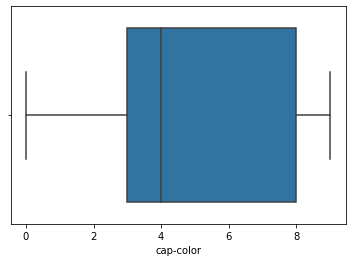

In [120]:
sns.boxplot(df['cap-color'])

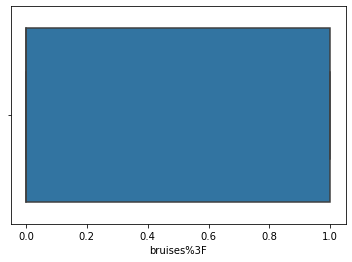

In [121]:
sns.boxplot(df['bruises%3F'])

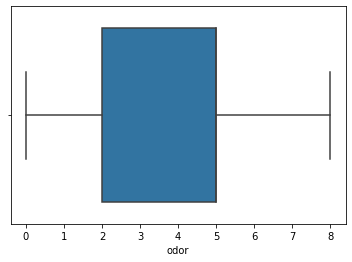

In [122]:
sns.boxplot(df['odor'])

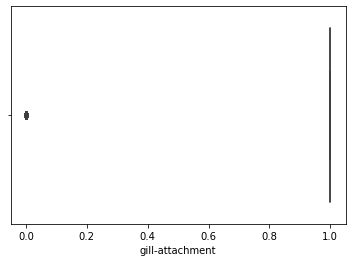

In [123]:
sns.boxplot(df['gill-attachment'])

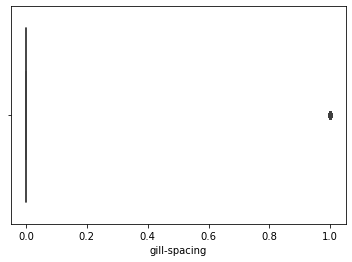

In [124]:
sns.boxplot(df['gill-spacing'])

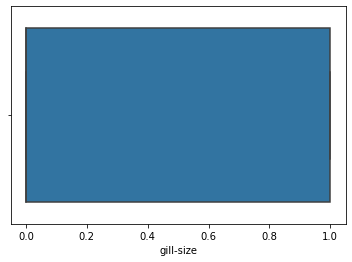

In [125]:
sns.boxplot(df['gill-size'])

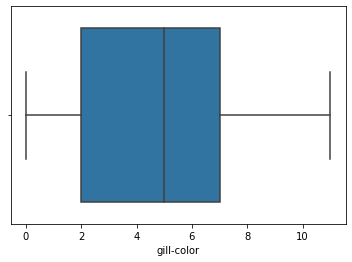

In [126]:
sns.boxplot(df['gill-color'])

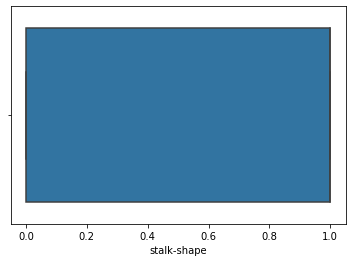

In [127]:
sns.boxplot(df['stalk-shape'])

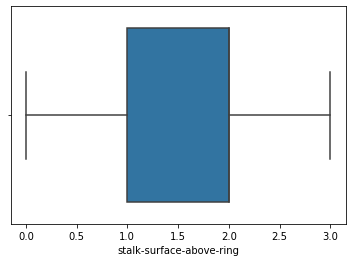

In [128]:
sns.boxplot(df['stalk-surface-above-ring'])

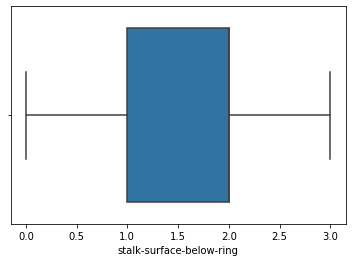

In [129]:
sns.boxplot(df['stalk-surface-below-ring'])

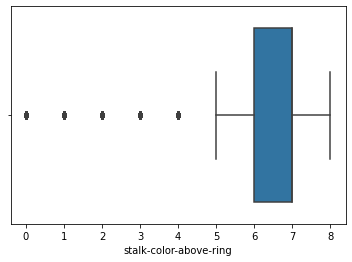

In [130]:
sns.boxplot(df['stalk-color-above-ring'])

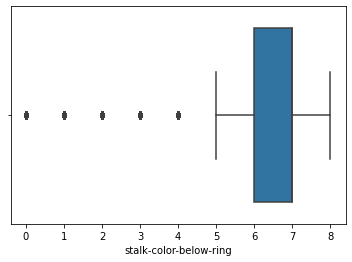

In [131]:
sns.boxplot(df['stalk-color-below-ring'])

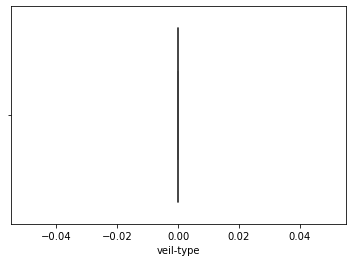

In [132]:
sns.boxplot(df['veil-type'])

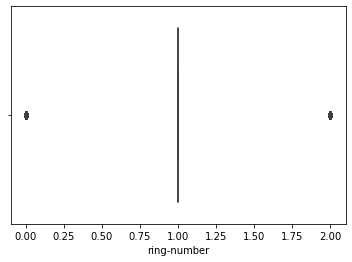

In [133]:
sns.boxplot(df['ring-number'])

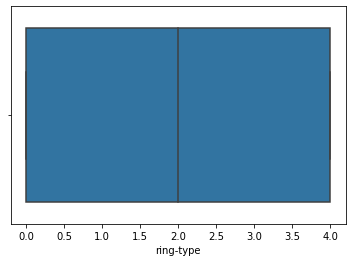

In [134]:
sns.boxplot(df['ring-type'])

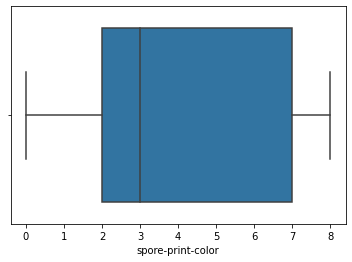

In [135]:
sns.boxplot(df['spore-print-color'])

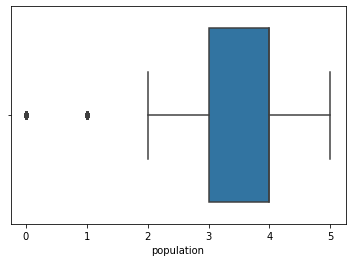

In [136]:
sns.boxplot(df['population'])

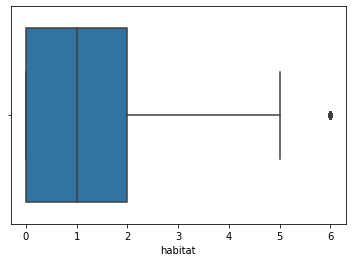

In [137]:
sns.boxplot(df['habitat'])

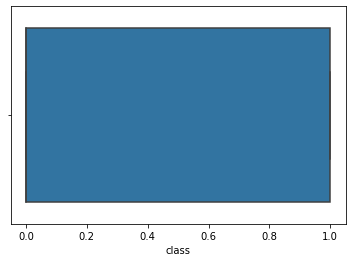

In [138]:
sns.boxplot(df['class'])

In [139]:
df.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises%3F                  0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
class                       0.071946
dtype: float64

# spliting the data

In [142]:
y = df['class']
x = df.drop('class', axis=1)

In [149]:
x


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [150]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [151]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled=sc.fit_transform(x)

In [144]:
#finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"best accuracy {accu*100}found on random_state {best_rstate}")

best accuracy 77.36628000878295found on random_state 149


In [146]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=149)

# finding the best model

In [161]:
log_model = LogisticRegression()
svm_model = SVC(C=1, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

# training

In [162]:
np.sum(y) / len(y)

0.48202855736090594

In [164]:
log_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)
nn_model.fit(x_train, y_train)


MLPClassifier(hidden_layer_sizes=(128, 128))

In [171]:
print(f'--Logistic Regression: {log_model.score(x_test, y_test)}')
print(f'--Support vector machine: {svm_model.score(x_test, y_test)}') 
print(f'--Neural Network: {nn_model.score(x_test, y_test)}')

--Logistic Regression: 0.9415384615384615
--Support vector machine: 0.9669230769230769
--Neural Network: 0.9967692307692307


# hyperparameter tuning

In [174]:
from sklearn.linear_model import SGDRegressor


In [175]:
#crearting parameter list to pass Gridsearchcv
parameters = {'max_iter': [500,700,900,1100,1300,1500],
              'alpha': [0.0001,0.001,0.01,1,10,100],
              'penalty':['elasticnet','l1','l2']}

In [180]:
from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)
print('Final accuracy:',r2_score(y_test,GCV_pred)*100)

Final accuracy: 65.52950342393365
